In [1]:
!pip install tensorflow
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 1.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.1
    Uninstalling protobuf-6.31.1:
      Successfully uninstalled protobuf-6.31.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.6 MB/s eta 0:00:00


In [2]:
# ## 1. Setup and Imports
# =============================================================================
print("--- [1] Setup and Imports ---")
import gc
import psutil
import time
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrow
import numpy as np
import pandas as pd
from scipy import stats

# Scikit-learn imports
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import roc_auc_score, roc_curve, make_scorer, confusion_matrix

# Deep Learning (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.callbacks import EarlyStopping

# Graph Analysis (NetworkX, PyTorch)
import torch
import torch.nn as nn
import torch.nn.functional as F
import networkx as nx

# Explainability (SHAP)
import shap

print("Libraries imported successfully.")

--- [1] Setup and Imports ---
Libraries imported successfully.


In [3]:
# =============================================================================
# ## 2. Configuration
# =============================================================================
print("\n--- [2] Configuration Settings ---")
# Suppress specific warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

# Pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', 50) # Limit columns displayed for clarity if needed
pd.set_option('display.width', 1000)

# Random seed for reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
torch.manual_seed(SEED)

print("Configuration set.")
start_time = time.time()



--- [2] Configuration Settings ---
Configuration set.



--- Re-running entire pipeline for SHAP analysis ---

--- [3] Data Loading and Initial Cleaning ---
Loading data from: https://raw.githubusercontent.com/kunguco/T/refs/heads/main/TT4.csv
Successfully loaded data. Initial shape: (54258, 11)
Dropped 475 rows with NaNs in key columns.
Data shape after dropping NaNs: (53783, 11)
Converted 'CR VALUE DATE' to datetime objects.
Dropped 'ORD PARTY ACCT' and 'BENEF PARTY ACCT' columns.
Data shape after dropping columns: (53783, 9)

--- [5] Feature Engineering ---
   - Calculating USD Equivalent...
   - Calculating Rule-Based & Derived Features...
   - Feature engineering complete.
   - Sample of engineered features:
   Log_Trans_Amount  Days_Since_Previous  Amount_Difference_From_Avg  High_Risk_Country_Transaction  Amount_Above_10k  High_Amount_or_Deviation_Flag  Below_Threshold_Same_Sender_Recipient_Date
0          6.421622                  0.0                         0.0                              0                 0                       

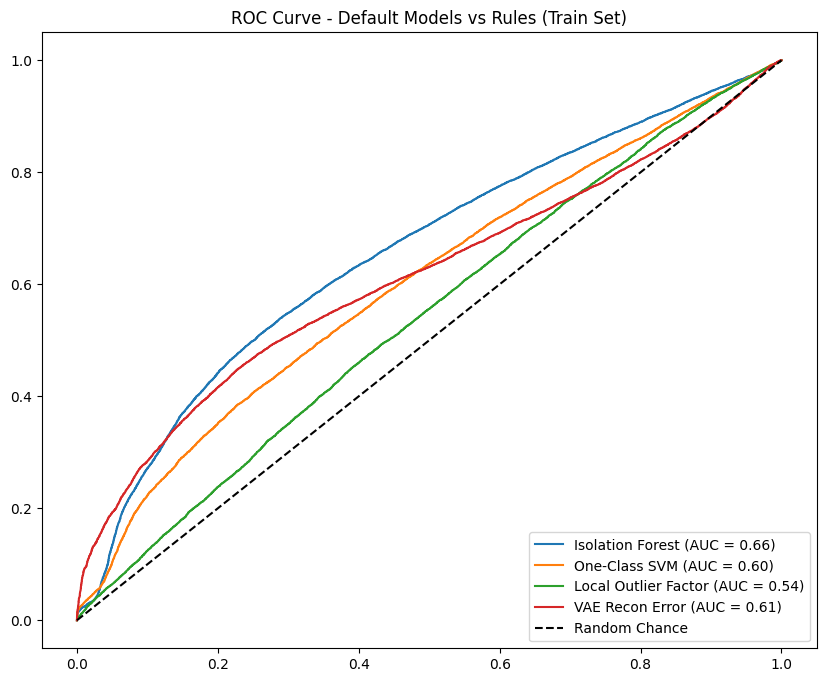


     --- Evaluating Default Scores on TEST Set ---
   - Isolation Forest - AUC vs Rule Flags (Test Set): 0.6678
   - One-Class SVM - AUC vs Rule Flags (Test Set): 0.6109
   - Local Outlier Factor - AUC vs Rule Flags (Test Set): 0.5493
   - VAE Recon Error - AUC vs Rule Flags (Test Set): 0.6264


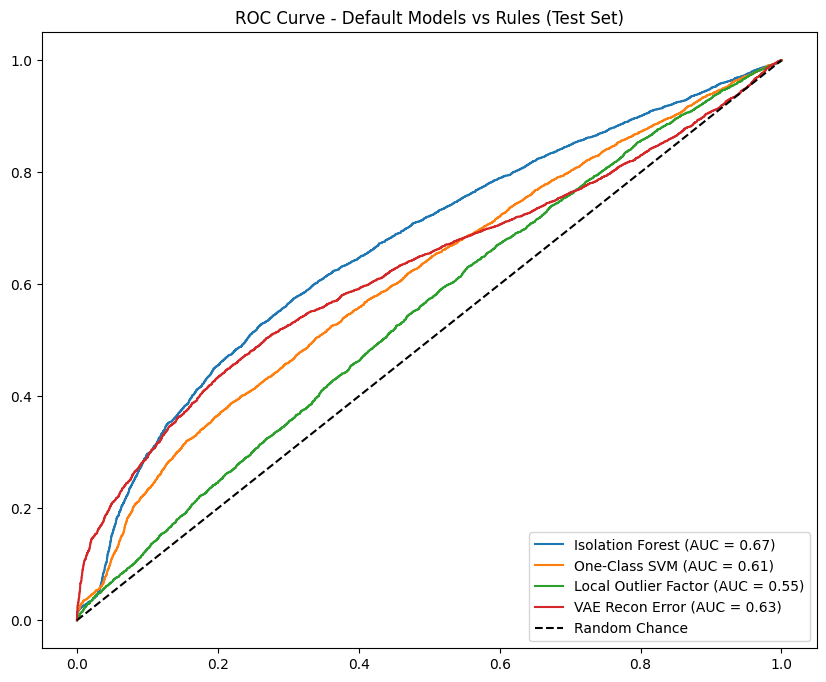

   - Default model evaluation complete.

   - Selecting Best Model, Tuning, & Defining Final Combined Scores...

   - Best default score source (vs Rules, excluding VAE): 'Isolation Forest' (Test AUC: 0.6678, Train AUC: 0.6556)
   - Tuning 'Isolation Forest' using GridSearchCV...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
     Best parameters found: {'contamination': 0.05, 'max_samples': 0.8, 'n_estimators': 150}
     Calculating scores using tuned model...
     Score calculation complete.

   - Considering combining best model scores with VAE Reconstruction Error...
     Using dynamic weights based on AUC: Model=51.6%, VAE=48.4%
     Combined final scores generated.

--- [10] Final Evaluation (vs Heuristic Rules) ---

--- Anomaly vs Rule Flag Summary & Visualization (Train Set - Final Combined Score) ---

--- Summary Table (Train Set - Final Combined Score) ---
                              Metric  Count
Total Valid Transactions (Train Set)  40337
            Rule Fla

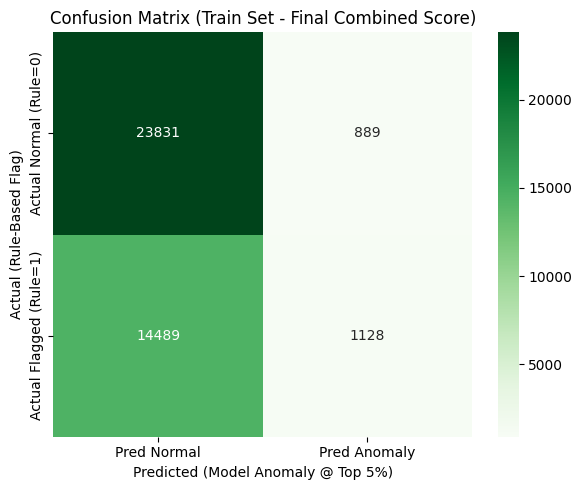


--- Anomaly vs Rule Flag Summary & Visualization (Test Set - Final Combined Score) ---

--- Summary Table (Test Set - Final Combined Score) ---
                             Metric  Count
Total Valid Transactions (Test Set)  13446
            Rule Flagged (Test Set)   5206
           Model Anomalies (Top 5%)    673
                       Overlap (TP)    387
                    Model-Only (FP)    286
                     Rule-Only (FN)   4819
                       Neither (TN)   7954

Proxy Precision (vs Rules, Test): 57.50%
Proxy Recall (vs Rules, Test):    7.43%

--- Confusion Matrix (Test Set - Final Combined Score: Model Anomaly vs Rule Flag) ---


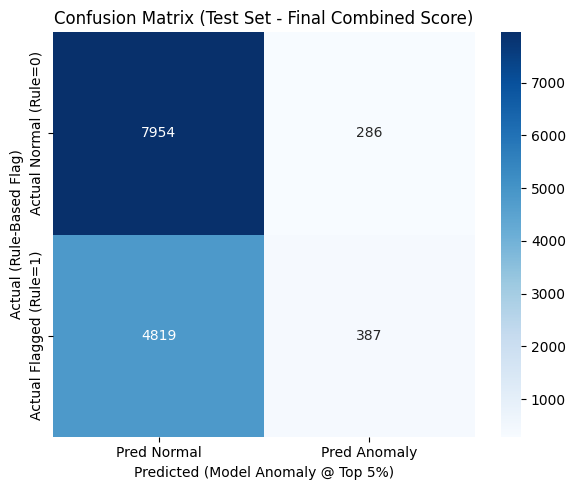


--- [11] Explainable AI (SHAP) ---
   - Generating SHAP explanations for the tuned 'Isolation Forest' model on the test set...
     Calculating SHAP values (this may take a while)...


  0%|          | 0/500 [00:00<?, ?it/s]

     Generating SHAP summary plot...


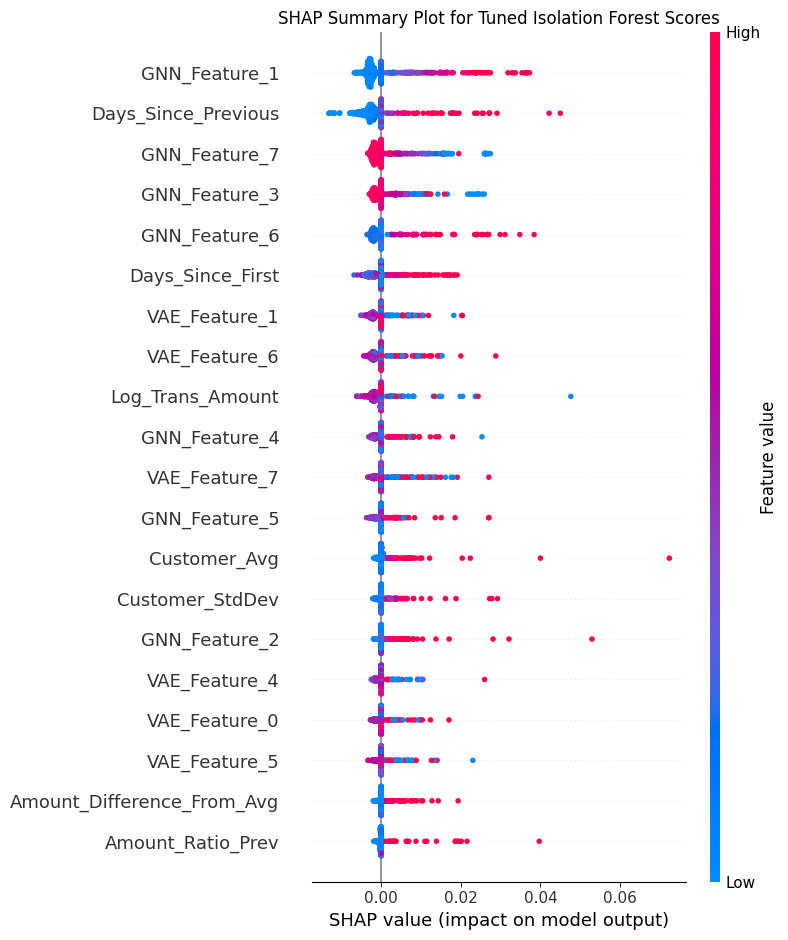

   - SHAP analysis complete.


In [4]:
# Re-run Data Loading, Cleaning, Feature Engineering, Data Splitting, Model Tuning, and SHAP Analysis in sequence
print("\n--- Re-running entire pipeline for SHAP analysis ---")

# =============================================================================
# ## 3. Data Loading and Initial Cleaning
# =============================================================================
print("\n--- [3] Data Loading and Initial Cleaning ---")
url = "https://raw.githubusercontent.com/kunguco/T/refs/heads/main/TT4.csv"
print(f"Loading data from: {url}")

try:
    df = pd.read_csv(url)
    print(f"Successfully loaded data. Initial shape: {df.shape}")

    # Drop rows with missing key values
    initial_rows = df.shape[0]
    df.dropna(subset=['TRAN REF NUM', 'BEN_COUNTRY'], inplace=True)
    dropped_rows = initial_rows - df.shape[0]
    print(f"Dropped {dropped_rows} rows with NaNs in key columns.")
    print(f"Data shape after dropping NaNs: {df.shape}")
    if df.empty: raise ValueError("DataFrame empty after dropping NaNs.")

    # Convert date column
    df['CR VALUE DATE'] = pd.to_datetime(df['CR VALUE DATE'], format='%d/%m/%Y')
    print("Converted 'CR VALUE DATE' to datetime objects.")

except Exception as e:
    print(f"Error during data loading or initial cleaning: {e}")
    # exit() # Don't exit in a notebook cell, just print error

# Dropping columns (from original cell nZfE_BuZPmKK)
if 'df' in locals():
    df = df.drop(['ORD PARTY ACCT', 'BENEF PARTY ACCT'], axis=1)
    print("Dropped 'ORD PARTY ACCT' and 'BENEF PARTY ACCT' columns.")
    print(f"Data shape after dropping columns: {df.shape}")
else:
    print("DataFrame 'df' not found. Skipping column drop.")


# =============================================================================
# ## 5. Feature Engineering
# =============================================================================
if 'df' in locals():
    print("\n--- [5] Feature Engineering ---")

    # --- 5.1. Currency Conversion ---
    print("   - Calculating USD Equivalent...")
    exchange_rates = {
        'USD': 1.0, 'CAD': 0.75, 'EUR': 0.92, 'GBP': 1.22, 'INR': 0.012,
        'ZAR': 0.055, 'KES': 0.007, 'UGX': 0.00027, 'TZS': 0.00042,
        'CHF': 1.08, 'CNY': 0.14, 'AUD': 0.67, 'JPY': 0.007, 'AED': 0.27,
        'MUR': 0.025, 'RWF': 0.0009
    }
    unknown_currencies = set()
    def convert_to_usd(row):
        currency = row['INS_CRNCY']
        rate = exchange_rates.get(currency, 0)
        if rate == 0 and pd.notna(currency) and currency not in unknown_currencies:
            print(f"     Warning: Currency '{currency}' not found. Assuming 0 USD.")
            unknown_currencies.add(currency)
        return row['INSTRUCTED AMT'] * rate
    df['USD_EQUIVALENT'] = df.apply(convert_to_usd, axis=1)

    # --- 5.2. Rule-Based & Derived Features ---
    print("   - Calculating Rule-Based & Derived Features...")
    # High-Risk Country
    ofac_high_risk = {'CU', 'IR', 'KP', 'RU', 'SY', 'UA', 'AF', 'BA', 'BY', 'MM', 'CF', 'CD', 'ET', 'HK', 'IQ', 'LB', 'LY', 'ML', 'NI', 'SD', 'CN', 'MZ', 'SS'}
    df['High_Risk_Country_Transaction'] = df['BEN_COUNTRY'].isin(ofac_high_risk).astype(int)
    # Time-based
    # Re-evaluate sort by key based on EDA insights - using ORD PARTY NAME
    if 'ORD PARTY NAME' in df.columns and 'CR VALUE DATE' in df.columns:
         df.sort_values(by=['ORD PARTY NAME', 'CR VALUE DATE'], inplace=True)
         df['Days_Since_Previous'] = df.groupby('ORD PARTY NAME')['CR VALUE DATE'].diff().dt.days.fillna(0)
         df['Days_Since_First'] = (df['CR VALUE DATE'] - df.groupby('ORD PARTY NAME')['CR VALUE DATE'].transform('min')).dt.days.fillna(0)
    else:
         print("     Warning: Missing columns for time-based features. Skipping.")
         df['Days_Since_Previous'] = 0
         df['Days_Since_First'] = 0


    # Amount-based
    df['Log_Trans_Amount'] = np.log1p(df['USD_EQUIVALENT'])
    df['Amount_Ratio_Prev'] = df.groupby('ORD PARTY NAME')['USD_EQUIVALENT'].pct_change().replace([np.inf, -np.inf], 0).fillna(0)
    # Customer Behavior (using Party Name)
    if 'ORD PARTY NAME' in df.columns and 'USD_EQUIVALENT' in df.columns:
        customer_stats = df.groupby('ORD PARTY NAME')['USD_EQUIVALENT'].agg(['mean', 'std']).reset_index()
        customer_stats.rename(columns={'mean': 'Customer_Avg', 'std': 'Customer_StdDev'}, inplace=True)
        df = df.merge(customer_stats, on='ORD PARTY NAME', how='left')
        df['Customer_StdDev'].fillna(0, inplace=True)
        df['Customer_Avg'].fillna(0, inplace=True)
    else:
         print("     Warning: Missing columns for customer behavior features. Skipping.")
         df['Customer_Avg'] = 0
         df['Customer_StdDev'] = 0

    # Deviation & Threshold
    df['Amount_Difference_From_Avg'] = (df['USD_EQUIVALENT'] - df['Customer_Avg']).abs()
    try:
        # Calculate 95th percentile based on ORD PARTY NAME
        if 'ORD PARTY NAME' in df.columns and 'USD_EQUIVALENT' in df.columns:
            df['Amount_Above_95th_Account'] = df.groupby('ORD PARTY NAME')['USD_EQUIVALENT'] \
                                             .transform(lambda x: (x > x.quantile(0.95)).astype(int) if x.count() > 1 else 0)
        else:
             print("     Warning: Missing columns for 95th percentile feature. Skipping.")
             df['Amount_Above_95th_Account'] = 0
    except Exception as e:
        print(f"     Warning: Error calculating 95th percentile: {e}. Setting flag to 0.")
        df['Amount_Above_95th_Account'] = 0

    # Core Rule Flags
    reporting_threshold = 10000.0
    df['Amount_Above_10k'] = (df['USD_EQUIVALENT'] > reporting_threshold).astype(int)
    df['Deviation_Flag_Condition'] = ((df['Amount_Difference_From_Avg'] > (2 * df['Customer_StdDev'])) & (df['Customer_StdDev'] > 0)).astype(int)
    df['High_Amount_or_Deviation_Flag'] = (df['Amount_Above_10k'] | df['Deviation_Flag_Condition']).astype(int)

    # Structuring Detection
    if 'CR VALUE DATE' in df.columns and 'ORD PARTY NAME' in df.columns and 'BENEF PARTY NAME' in df.columns and 'USD_EQUIVALENT' in df.columns:
        df['txn_date_str'] = df['CR VALUE DATE'].dt.strftime('%Y-%m-%d')
        grouping_cols = ['txn_date_str', 'ORD PARTY NAME', 'BENEF PARTY NAME']
        df['daily_small_txn_count'] = df[df['USD_EQUIVALENT'] < reporting_threshold].groupby(grouping_cols)['USD_EQUIVALENT'].transform('count').fillna(0)
        df['Below_Threshold_Same_Sender_Recipient_Date'] = (df['daily_small_txn_count'] > 1).astype(int)
        df.drop(columns=['txn_date_str', 'daily_small_txn_count'], inplace=True)
    else:
        print("     Warning: Missing columns for structuring detection feature. Skipping.")
        df['Below_Threshold_Same_Sender_Recipient_Date'] = 0


    print("   - Feature engineering complete.")
    # Print sample of engineered features only if columns exist
    engineered_cols_to_print = ['Log_Trans_Amount', 'Days_Since_Previous', 'Amount_Difference_From_Avg',
                              'High_Risk_Country_Transaction', 'Amount_Above_10k',
                              'High_Amount_or_Deviation_Flag', 'Below_Threshold_Same_Sender_Recipient_Date']
    existing_engineered_cols = [col for col in engineered_cols_to_print if col in df.columns]
    if existing_engineered_cols:
        print("   - Sample of engineered features:")
        print(df[existing_engineered_cols].head(3))
    else:
        print("   - No engineered features to display sample.")

else:
    print("DataFrame 'df' not found. Skipping Feature Engineering.")


# =============================================================================
# ## 7. Define Heuristic Target and Calculate Flag Summary (Re-running to ensure target exists)
# =============================================================================
if 'df' in locals():
    print("\n--- [7] Define Heuristic Target & Flag Summary ---")

    # --- 7.1. Create Heuristic Target ---
    rule_flags_for_heuristic = [
        'High_Risk_Country_Transaction',
        'Amount_Above_10k',
        'High_Amount_or_Deviation_Flag',
        'Below_Threshold_Same_Sender_Recipient_Date'
    ]
    print(f"   - Defining heuristic target ('is_rule_flagged') based on: {rule_flags_for_heuristic}")
    for flag in rule_flags_for_heuristic: # Ensure flags are binary integers
        if flag not in df.columns:
            print(f"     Warning: Heuristic flag column '{flag}' not found. Setting to 0.")
            df[flag] = 0
        elif df[flag].dtype == 'bool':
            df[flag] = df[flag].astype(int)
    df['is_rule_flagged'] = df[rule_flags_for_heuristic].max(axis=1)
    print("   - Value counts for 'is_rule_flagged':")
    print(df['is_rule_flagged'].value_counts())

    # --- 7.2. Calculate Flag Summary ---
    print("\n   - Calculating Rule Flag Counts for Summary...")
    try:
        # Filter to only include flags that exist in the DataFrame
        existing_rule_flags = [flag for flag in rule_flags_for_heuristic if flag in df.columns]
        flag_counts = df[existing_rule_flags].sum().sort_values(ascending=False)

        # Check if both columns for the combination flag exist
        if 'Below_Threshold_Same_Sender_Recipient_Date' in df.columns and 'High_Risk_Country_Transaction' in df.columns:
            flagged_structuring_and_risk = ((df['Below_Threshold_Same_Sender_Recipient_Date'] == 1) & (df['High_Risk_Country_Transaction'] == 1)).sum()
        else:
             print("     Warning: Missing columns for 'Structuring Pattern AND to High-Risk Country' combination. Setting count to 0.")
             flagged_structuring_and_risk = 0


        # Build summary data dynamically based on existing flags
        rule_descriptions = {
            'High_Amount_or_Deviation_Flag': 'High Amount (> $10k) OR Significant Deviation',
            'Amount_Above_10k': 'Transactions > $10K Threshold',
            'High_Risk_Country_Transaction': 'Transaction to High-Risk Country',
            'Below_Threshold_Same_Sender_Recipient_Date': 'Structuring Pattern Detected (< Threshold)',
        }

        summary_data_list = []
        for flag in existing_rule_flags:
            summary_data_list.append({
                'Rule Description': rule_descriptions.get(flag, flag), # Use description or flag name
                'Flagged Transactions Count': flag_counts.get(flag, 0)
            })

        # Add the combination flag if calculated
        if 'Below_Threshold_Same_Sender_Recipient_Date' in df.columns and 'High_Risk_Country_Transaction' in df.columns:
             summary_data_list.append({
                'Rule Description': 'Structuring Pattern AND to High-Risk Country',
                'Flagged Transactions Count': flagged_structuring_and_risk,
            })


        flagged_summary = pd.DataFrame(summary_data_list)
        print("\n--- Flagged Transaction Summary ---")
        print(flagged_summary)

        total_flagged = df['is_rule_flagged'].sum()
        percentage_flagged = (total_flagged / len(df)) * 100
        print(f"\nTotal heuristic flagged transactions: {total_flagged} ({percentage_flagged:.2f}%)")

    except Exception as e:
        print(f"   - Error creating flag summary: {e}")
else:
    print("DataFrame 'df' not found. Skipping Heuristic Target Definition.")

# =============================================================================
# ## 8. Deep Learning Feature Extraction (Re-running VAE and GNN)
# =============================================================================
if 'df' in locals():
    print("\n--- [8] Deep Learning Feature Extraction ---")

    # --- 8.1. Variational Autoencoder (VAE) ---

    # Batch Norm, stabilized Sampling layer, adjusted optimizer, and NaN handling)
    print("   --- Training VAE ---")
    num_features_vae = [
        'Days_Since_Previous', 'Days_Since_First', 'Log_Trans_Amount',
        'Amount_Ratio_Prev', 'Amount_Difference_From_Avg',
        'Customer_Avg', 'Customer_StdDev'
    ]
    num_features_vae = [f for f in num_features_vae if f in df.columns] # Ensure features exist
    if not num_features_vae:
        print("   - No numerical features available for VAE. Skipping VAE training and feature extraction.")
        df['vae_reconstruction_error'] = 0 # Add placeholder column
        vae_feature_names = [f'VAE_Feature_{i}' for i in range(latent_dim)] # Define names even if not added
        for name in vae_feature_names: df[name] = 0 # Add placeholder columns
    else:
        print(f"   - VAE Input Features ({len(num_features_vae)}): {num_features_vae}")
        X_vae_input = df[num_features_vae].copy().replace([np.inf, -np.inf], 0).fillna(0)
        scaler_vae = RobustScaler()
        X_vae_scaled = scaler_vae.fit_transform(X_vae_input)
        if np.isnan(X_vae_scaled).any() or np.isinf(X_vae_scaled).any(): raise ValueError("Invalid VAE input after scaling.")
        print(f"   - VAE input scaled shape: {X_vae_scaled.shape}")

        latent_dim = 8
        class Sampling(layers.Layer):
            def call(self, inputs):
                z_mean, z_log_var = inputs
                batch = tf.shape(z_mean)[0]; dim = tf.shape(z_mean)[1]
                epsilon = tf.keras.backend.random_normal(shape=(batch, dim), seed=SEED)
                z_log_var_clipped = tf.clip_by_value(z_log_var, -10.0, 10.0)
                kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(1 + z_log_var_clipped - tf.square(z_mean) - tf.exp(z_log_var_clipped), axis=1))
                self.add_loss(kl_loss)
                z = z_mean + tf.exp(0.5 * z_log_var) * epsilon
                return z
            def compute_output_shape(self, input_shape): return input_shape[0]

        vae_input_shape = (X_vae_scaled.shape[1],)
        vae_inputs = Input(shape=vae_input_shape, name="VAE_Input")
        x_enc = layers.Dense(32, activation='relu')(vae_inputs) # Simplified slightly, BN after dense
        x_enc = layers.BatchNormalization()(x_enc)
        x_enc = layers.Dense(16, activation='relu')(x_enc)
        x_enc = layers.BatchNormalization()(x_enc)
        z_mean = layers.Dense(latent_dim, name="z_mean")(x_enc)
        z_log_var = layers.Dense(latent_dim, name="z_log_var")(x_enc)
        z = Sampling(name="Sampling_Layer")([z_mean, z_log_var])
        encoder = Model(vae_inputs, [z_mean, z_log_var, z], name="encoder")

        latent_inputs = Input(shape=(latent_dim,), name="Latent_Input")
        x_dec = layers.Dense(16, activation='relu')(latent_inputs)
        x_dec = layers.BatchNormalization()(x_dec)
        x_dec = layers.Dense(32, activation='relu')(x_dec)
        x_dec = layers.BatchNormalization()(x_dec)
        vae_decoder_outputs = layers.Dense(vae_input_shape[0], activation="linear", name="VAE_Output")(x_dec)
        decoder = Model(latent_inputs, vae_decoder_outputs, name="decoder")

        vae_outputs = decoder(encoder(vae_inputs)[2])
        vae = Model(vae_inputs, vae_outputs, name="vae")
        vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005, clipnorm=1.0), loss="mse")
        print("   - VAE Model built and compiled.")

        print("   - Training VAE...")
        history_vae = vae.fit(X_vae_scaled, X_vae_scaled, epochs=50, batch_size=128, validation_split=0.1,
                              callbacks=[EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=1)],
                              verbose=1)
        final_val_loss = history_vae.history['val_loss'][-1]
        print(f"   - VAE training complete. Final validation loss: {final_val_loss:.4f}")
        if np.isnan(final_val_loss): raise RuntimeError("VAE training resulted in NaN loss.")

        print("   - Extracting VAE features and reconstruction error...")
        z_mean_pred, z_log_var_pred, z_encoded = encoder.predict(X_vae_scaled)
        vae_reconstructions = vae.predict(X_vae_scaled)
        if np.isnan(z_encoded).any() or np.isnan(vae_reconstructions).any():
            print("   - !!! WARNING: NaNs detected in VAE outputs! Recon error calculation may be affected.")
            mse_reconstruction = np.full(len(X_vae_scaled), np.nan)
        else:
            mse_reconstruction = np.mean(np.power(X_vae_scaled - vae_reconstructions, 2), axis=1)

        df['vae_reconstruction_error'] = mse_reconstruction
        vae_feature_names = [f'VAE_Feature_{i}' for i in range(latent_dim)]
        vae_features_df = pd.DataFrame(z_encoded, columns=vae_feature_names, index=df.index)
        df = pd.concat([df, vae_features_df], axis=1)
        print(f"   - Added VAE features and 'vae_reconstruction_error'.")

    # --- 8.2. Graph Neural Network (GNN) ---
    print("\n   --- Building Graph & Training GNN ---")
    if 'ORD PARTY NAME' in df.columns and 'BENEF PARTY NAME' in df.columns and 'USD_EQUIVALENT' in df.columns:
        parties = set(df['ORD PARTY NAME']).union(set(df['BENEF PARTY NAME']))
        node_map = {node: i for i, node in enumerate(parties)}
        node_map_rev = {i: node for node, i in node_map.items()}
        num_nodes = len(node_map)
        print(f"   - Node map created ({num_nodes} unique parties).")

        G = nx.DiGraph(); G.add_nodes_from(range(num_nodes))
        print("   - Adding edges to graph...")
        edge_count = 0
        for idx, row in df.iterrows():
            sender_idx = node_map.get(row['ORD PARTY NAME']); receiver_idx = node_map.get(row['BENEF PARTY NAME'])
            amount = row['USD_EQUIVALENT']
            if sender_idx is not None and receiver_idx is not None and sender_idx != receiver_idx:
                weight = max(0, amount)
                if G.has_edge(sender_idx, receiver_idx): G[sender_idx][receiver_idx]['weight'] += weight; G[sender_idx][receiver_idx]['count'] += 1
                else: G.add_edge(sender_idx, receiver_idx, weight=weight, count=1); edge_count += 1
        print(f"   - Graph built ({G.number_of_nodes()} nodes, {edge_count} unique directed edges).")

        gnn_output_dim = 8
        if edge_count == 0:
            print("   - Warning: No edges found. Skipping GNN training. GNN features set to zeros.")
            final_node_embeddings = np.zeros((num_nodes, gnn_output_dim))
        else:
            print("   - Creating Aggregated Node Features for GNN...")
            sender_stats_gnn = df.groupby('ORD PARTY NAME')['USD_EQUIVALENT'].agg(['mean', 'count', 'std']).fillna(0)
            receiver_stats_gnn = df.groupby('BENEF PARTY NAME')['USD_EQUIVALENT'].agg(['mean', 'count', 'std']).fillna(0)
            feature_dim_gnn = 3
            node_features_list = []
            for i in range(num_nodes):
                party_name = node_map_rev.get(i); s_mean, s_count, s_std = 0,0,0; r_mean, r_count, r_std = 0,0,0
                if party_name:
                    if party_name in sender_stats_gnn.index: s_stat = sender_stats_gnn.loc[party_name]; s_mean, s_count, s_std = s_stat['mean'], s_stat['count'], s_stat['std']
                    if party_name in receiver_stats_gnn.index: r_stat = receiver_stats_gnn.loc[party_name]; r_mean, r_count, r_std = r_stat['mean'], r_stat['count'], r_stat['std']
                total_count = s_count + r_count
                combined_mean = (s_mean * s_count + r_mean * r_count) / total_count if total_count > 0 else 0
                combined_std = (s_std * s_count + r_std * r_count) / total_count if total_count > 0 else 0
                node_features_list.append([combined_mean, total_count, combined_std])
            node_features_tensor = torch.tensor(node_features_list, dtype=torch.float)
            node_features_tensor = (node_features_tensor - node_features_tensor.mean(dim=0)) / (node_features_tensor.std(dim=0) + 1e-6)
            print(f"   - Aggregated Node Features created and scaled (Dim: {feature_dim_gnn}).")

            class SimpleGNNEmbedder(nn.Module):
                def __init__(self, in_c, hidden_c, out_c): super().__init__(); self.l1=nn.Linear(in_c,hidden_c); self.l2=nn.Linear(hidden_c,out_c)
                def forward(self, x): return self.l2(F.relu(self.l1(x)))
            gnn_model = SimpleGNNEmbedder(feature_dim_gnn, 16, gnn_output_dim)
            optimizer_gnn = torch.optim.Adam(gnn_model.parameters(), lr=0.01)
            print(f"   - Simple GNN model defined (Output Dim: {gnn_output_dim}).")

            print("   - Training GNN...")
            gnn_model.train(); n_gnn_epochs = 30
            target_node_features = torch.zeros((num_nodes, gnn_output_dim), dtype=torch.float)
            target_node_features[:, :feature_dim_gnn] = node_features_tensor
            for epoch in range(n_gnn_epochs):
                optimizer_gnn.zero_grad()
                out_embeddings = gnn_model(node_features_tensor)
                loss = F.mse_loss(out_embeddings, target_node_features)
                loss.backward(); optimizer_gnn.step()
                if epoch % 10 == 0 or epoch == n_gnn_epochs - 1: print(f"     GNN Epoch {epoch}: Loss = {loss.item():.4f}")

            print("   - Extracting GNN Features...")
            gnn_model.eval()
            with torch.no_grad(): final_node_embeddings = gnn_model(node_features_tensor).numpy()
            if np.isnan(final_node_embeddings).any():
                print("   - !!! WARNING: NaNs detected in GNN embeddings! Imputing with 0.")
                final_node_embeddings = np.nan_to_num(final_node_embeddings)

            # --- Merge GNN Features to DataFrame ---
            gnn_feature_names = [f'GNN_Feature_{i}' for i in range(gnn_output_dim)]
            gnn_features_df = pd.DataFrame(final_node_embeddings, columns=gnn_feature_names)
            gnn_features_df['party_name_key'] = gnn_features_df.index.map(node_map_rev)
            df = df.merge(gnn_features_df, left_on='ORD PARTY NAME', right_on='party_name_key', how='left').drop(columns=['party_name_key'])
            df[gnn_feature_names] = df[gnn_feature_names].fillna(0)
            print(f"   - Added GNN features. DataFrame shape: {df.shape}")
    else:
         print("   - Missing columns for GNN feature extraction. Skipping GNN.")
         gnn_output_dim = 8 # Define to prevent NameError later
         gnn_feature_names = [f'GNN_Feature_{i}' for i in range(gnn_output_dim)]
         for name in gnn_feature_names: df[name] = 0 # Add placeholder columns



else:
    print("DataFrame 'df' not found. Skipping Deep Learning Feature Extraction.")


# =============================================================================
# ## 9. Anomaly Detection Pipeline (Re-running)
# =============================================================================
if 'df' in locals() and 'is_rule_flagged' in df.columns:
    print("\n--- [9] Anomaly Detection Pipeline ---")

    # --- 9.1. Prepare Combined Features and Split Data ---
    print("   - Preparing combined features and splitting data...")
    rule_features_final = ['Days_Since_Previous', 'Days_Since_First', 'Log_Trans_Amount', 'Amount_Ratio_Prev', 'Amount_Difference_From_Avg', 'Customer_Avg', 'Customer_StdDev']
    vae_feature_names = [f'VAE_Feature_{i}' for i in range(latent_dim)] if 'latent_dim' in locals() else []
    gnn_feature_names = [f'GNN_Feature_{i}' for i in range(gnn_output_dim)] if 'gnn_output_dim' in locals() else []

    all_feature_cols = rule_features_final + vae_feature_names + gnn_feature_names
    all_feature_cols = [col for col in all_feature_cols if col in df.columns]
    if not all_feature_cols: raise ValueError("No features selected for final model.")
    print(f"   - Final features ({len(all_feature_cols)}): {all_feature_cols}")

    X_combined = df[all_feature_cols].copy()
    y_heuristic_aligned = df.loc[X_combined.index, 'is_rule_flagged'].copy()
    if X_combined.isnull().any().any(): X_combined.fillna(0, inplace=True)
    X_combined.replace([np.inf, -np.inf], 0, inplace=True)

    scaler_combined = StandardScaler(); X_combined_scaled = scaler_combined.fit_transform(X_combined)
    print(f"   - Combined features scaled shape: {X_combined_scaled.shape}")

    X_train_comb, X_test_comb, y_train_heuristic, y_test_heuristic = train_test_split(
        X_combined_scaled, y_heuristic_aligned, test_size=0.25, random_state=SEED, stratify=y_heuristic_aligned
    )
    test_set_original_indices = y_test_heuristic.index
    train_set_original_indices = y_train_heuristic.index
    print(f"   - Data split: Train={X_train_comb.shape}, Test={X_test_comb.shape}")
    print(f"     Rule flags: Train={y_train_heuristic.mean():.2%}, Test={y_test_heuristic.mean():.2%}")


    # --- 9.2. Train and Evaluate Default Anomaly Models ---
    print("\n   - Training and Evaluating Default Anomaly Models (vs Heuristic)...")
    if_default = IsolationForest(contamination='auto', random_state=SEED, n_jobs=-1)
    ocsvm_default = OneClassSVM(nu=0.1, gamma='scale', kernel='rbf', max_iter=1000)
    lof_default = LocalOutlierFactor(contamination='auto', novelty=True, n_jobs=-1)
    models_to_evaluate = {"Isolation Forest": if_default, "One-Class SVM": ocsvm_default, "Local Outlier Factor": lof_default}
    test_scores_default = {}
    train_scores_default = {}

    for name, model in models_to_evaluate.items():
        print(f"     Fitting {name}...")
        try:
            model.fit(X_train_comb)
            if hasattr(model, 'score_samples'):
                train_scores_default[name] = np.nan_to_num(-model.score_samples(X_train_comb))
                test_scores_default[name] = np.nan_to_num(-model.score_samples(X_test_comb))
            elif hasattr(model, 'decision_function'):
                train_scores_default[name] = np.nan_to_num(-model.decision_function(X_train_comb))
                test_scores_default[name] = np.nan_to_num(-model.decision_function(X_test_comb))
            else:
                print(f"     Warning: {name} lacks standard scoring method.")
            print(f"     Scoring with {name} complete.")
        except Exception as e: print(f"     Error fitting/scoring {name}: {e}")

    print("   - Retrieving VAE Reconstruction Error scores...")
    try:
        if 'vae_reconstruction_error' in df.columns and len(df) == len(X_combined):
            train_vae_scores = df.loc[train_set_original_indices, 'vae_reconstruction_error'].values
            test_vae_scores = df.loc[test_set_original_indices, 'vae_reconstruction_error'].values
            if len(train_vae_scores) == len(X_train_comb) and not np.isnan(train_vae_scores).all():
                 train_scores_default["VAE Recon Error"] = np.nan_to_num(train_vae_scores)
            if len(test_vae_scores) == len(X_test_comb) and not np.isnan(test_vae_scores).all():
                test_scores_default["VAE Recon Error"] = np.nan_to_num(test_vae_scores)
            print("     Added VAE scores.")
        else: print("     Warning: 'vae_reconstruction_error' not found or length mismatch.")
    except Exception as e: print(f"    Error adding VAE scores: {e}")

    # Evaluate and Plot ROC (Function defined here for scope)
    def evaluate_anomaly_scores_roc_plot(dataset_name, scores_dict, y_true_flags, ax_roc):
        """Calculates AUC and plots ROC curve."""
        results = {}
        for name, scores in scores_dict.items():
            auc = np.nan
            if scores is None or y_true_flags is None or len(scores) != len(y_true_flags):
                print(f"   - Warning: Score/target mismatch for {name} on {dataset_name}. Skipping.")
                continue
            try:
                # Ensure y_true_flags is a Series or has an index that matches the scores if scores are a numpy array
                if isinstance(y_true_flags, np.ndarray):
                    # If scores are from numpy array, ensure y_true_flags is also treated as such for indexing valid points
                    y_true_valid = y_true_flags
                else: # Assume y_true_flags is a pandas Series
                    y_true_valid = y_true_flags.values # Use values if scores are numpy

                valid_idx_bool = ~np.isnan(scores) & ~np.isinf(scores)
                scores_valid = scores[valid_idx_bool]
                y_true_valid_filtered = y_true_valid[valid_idx_bool] # Filter true labels based on valid scores

                if y_true_valid_filtered.size == 0 or len(np.unique(y_true_valid_filtered)) < 2:
                    print(f"   - Skipping AUC for {name} on {dataset_name}: Not enough valid data points or classes.")
                    continue
                auc = roc_auc_score(y_true_valid_filtered, scores_valid)
                results[name] = auc
                print(f"   - {name} - AUC vs Rule Flags ({dataset_name} Set): {auc:.4f}")
                if ax_roc is not None:
                     fpr, tpr, _ = roc_curve(y_true_valid_filtered, scores_valid)
                     ax_roc.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
            except Exception as e:
                print(f"   - Error evaluating {name} on {dataset_name}: {e}")
        return results


    print("\n     --- Evaluating Default Scores on TRAIN Set ---")
    fig_roc_train_def, ax_roc_train_def = plt.subplots(figsize=(10, 8))
    # Use the original y_train_heuristic Series which has the index alignment
    model_auc_scores_train = evaluate_anomaly_scores_roc_plot("Train", train_scores_default, y_train_heuristic, ax_roc_train_def)
    ax_roc_train_def.plot([0, 1], [0, 1], 'k--', label='Random Chance'); ax_roc_train_def.legend(loc='lower right'); ax_roc_train_def.set_title('ROC Curve - Default Models vs Rules (Train Set)'); plt.show()

    print("\n     --- Evaluating Default Scores on TEST Set ---")
    fig_roc_test_def, ax_roc_test_def = plt.subplots(figsize=(10, 8))
     # Use the original y_test_heuristic Series which has the index alignment
    model_auc_scores_test = evaluate_anomaly_scores_roc_plot("Test", test_scores_default, y_test_heuristic, ax_roc_test_def)
    ax_roc_test_def.plot([0, 1], [0, 1], 'k--', label='Random Chance'); ax_roc_test_def.legend(loc='lower right'); ax_roc_test_def.set_title('ROC Curve - Default Models vs Rules (Test Set)'); plt.show()

    print("   - Default model evaluation complete.")


    # --- 9.3. Select Best Model, Tune, and Define Final Combined Scores ---
    print("\n   - Selecting Best Model, Tuning, & Defining Final Combined Scores...")
    # Exclude VAE Recon Error from the selection of the best model for tuning
    # Use the model_auc_scores_test calculated just above
    models_for_selection = {k: v for k, v in model_auc_scores_test.items() if k != "VAE Recon Error" and pd.notna(v) and v > 0}

    final_scores_test = None; final_scores_train = None
    best_anomaly_model_tuned = None; best_model_name = None

    if not models_for_selection:
        print("   - Warning: No valid positive AUC scores on test set from selected models. Cannot select/tune.")
    else:
        best_model_name = max(models_for_selection, key=models_for_selection.get)
        best_test_auc = models_for_selection[best_model_name]
        # Use the model_auc_scores_train calculated just above for train AUC comparison
        best_train_auc = model_auc_scores_train.get(best_model_name, np.nan)
        print(f"\n   - Best default score source (vs Rules, excluding VAE): '{best_model_name}' (Test AUC: {best_test_auc:.4f}, Train AUC: {best_train_auc:.4f})")

        print(f"   - Tuning '{best_model_name}' using GridSearchCV...")
        param_grids = {
            "Isolation Forest": {'n_estimators': [150, 250], 'max_samples': [0.8, 0.9], 'contamination': [0.05, 0.1]},
            "One-Class SVM": {'nu': [0.05, 0.1], 'gamma': ['scale', 0.1], 'kernel': ['rbf']},
            "Local Outlier Factor": {'n_neighbors': [20, 35], 'contamination': [0.05, 0.1], 'metric': ['minkowski', 'cosine']}
        }
        param_grid = param_grids.get(best_model_name)
        if param_grid:
            base_model = models_to_evaluate[best_model_name]
            def auc_scorer_gridcv(model, X, y_true):
                try:
                    y_scores = -model.score_samples(X) if hasattr(model, 'score_samples') else -model.decision_function(X)
                    # y_true here is a numpy array from GridSearchCV, filter based on valid scores
                    valid = ~np.isnan(y_scores) & ~np.isinf(y_scores)
                    y_true_valid_filtered = y_true[valid]
                    if valid.sum() < 2 or len(np.unique(y_true_valid_filtered)) < 2: return 0.0
                    return roc_auc_score(y_true_valid_filtered, y_scores[valid])
                except Exception: return 0.0

            heuristic_auc_scorer = make_scorer(auc_scorer_gridcv, greater_is_better=True)
            grid_search = GridSearchCV(base_model, param_grid, scoring=heuristic_auc_scorer, cv=3, n_jobs=-1, verbose=1)
            try:
                grid_search.fit(X_train_comb, y_train_heuristic.values) # Pass numpy values to GridSearchCV
                print(f"     Best parameters found: {grid_search.best_params_}")
                best_anomaly_model_tuned = grid_search.best_estimator_
            except Exception as e:
                 print(f"     Error during GridSearchCV: {e}. Using default model.")
                 best_anomaly_model_tuned = base_model
            print(f"     Calculating scores using {'tuned' if best_anomaly_model_tuned is not base_model else 'default'} model...") # Corrected check
            try:
                if hasattr(best_anomaly_model_tuned, 'score_samples'):
                    scores_train_tuned = -best_anomaly_model_tuned.score_samples(X_train_comb)
                    scores_test_tuned = -best_anomaly_model_tuned.score_samples(X_test_comb)
                elif hasattr(best_anomaly_model_tuned, 'decision_function'):
                    scores_train_tuned = -best_anomaly_model_tuned.decision_function(X_train_comb)
                    scores_test_tuned = -best_anomaly_model_tuned.decision_function(X_test_comb)
                else: raise AttributeError("Model missing scoring function.")
                scores_train_tuned = np.nan_to_num(scores_train_tuned)
                scores_test_tuned = np.nan_to_num(scores_test_tuned)
                print("     Score calculation complete.")
            except Exception as e: print(f"     Error scoring with tuned model: {e}"); best_model_name = None
        else:
            print(f"   - No grid defined for '{best_model_name}'. Using default scores.")
            scores_train_tuned = train_scores_default.get(best_model_name)
            scores_test_tuned = test_scores_default.get(best_model_name)
            best_anomaly_model_tuned = models_to_evaluate.get(best_model_name)
            if scores_train_tuned is None or scores_test_tuned is None: best_model_name = None

        # Combine with VAE (Optional - keeping the structure but won't be the best model now)
        # This section is mostly kept for completeness but the focus is on the non-VAE model for SHAP
        if best_model_name and "VAE Recon Error" in test_scores_default and "VAE Recon Error" in train_scores_default:
            print("\n   - Considering combining best model scores with VAE Reconstruction Error...")
            train_vae_scores = train_scores_default["VAE Recon Error"]
            test_vae_scores = test_scores_default["VAE Recon Error"]

            # Check for valid VAE scores before scaling and combining
            if not (np.isnan(train_vae_scores).all() or np.isnan(test_vae_scores).all()):
                try:
                    vae_scaler = StandardScaler()
                    train_vae_scores_scaled = vae_scaler.fit_transform(train_vae_scores.reshape(-1, 1)).flatten()
                    test_vae_scores_scaled = vae_scaler.transform(test_vae_scores.reshape(-1, 1)).flatten()
                    model_scaler = StandardScaler()

                    if best_model_name == "VAE Recon Error":
                         # This path is technically excluded by models_for_selection, but for safety
                         scores_train_scaled = train_vae_scores_scaled
                         scores_test_scaled = test_vae_scores_scaled
                    elif scores_train_tuned is not None and scores_test_tuned is not None:
                         scores_train_scaled = model_scaler.fit_transform(scores_train_tuned.reshape(-1, 1)).flatten()
                         scores_test_scaled = model_scaler.transform(scores_test_tuned.reshape(-1, 1)).flatten()
                    else:
                         print("    - Cannot combine: Model scores missing after tuning/default selection.")
                         scores_train_scaled = None
                         scores_test_scaled = None


                    if scores_train_scaled is not None and scores_test_scaled is not None:
                        # Decide weighting strategy - simple average or based on AUC
                        # For simplicity, let's try a weighted average based on AUC performance relative to the best of the two
                        model_auc = model_auc_scores_test.get(best_model_name, 0)
                        vae_auc = model_auc_scores_test.get("VAE Recon Error", 0)
                        total_auc = model_auc + vae_auc
                        if total_auc > 0:
                            weight_model = model_auc / total_auc
                            weight_vae = vae_auc / total_auc
                        else: # Fallback to simple average if AUCs are zero or negative
                            weight_model = 0.5
                            weight_vae = 0.5

                        print(f"     Using dynamic weights based on AUC: Model={weight_model*100:.1f}%, VAE={weight_vae*100:.1f}%")
                        final_scores_train = weight_model * scores_train_scaled + weight_vae * train_vae_scores_scaled
                        final_scores_test = weight_model * scores_test_scaled + weight_vae * test_vae_scores_scaled
                        print("     Combined final scores generated.")
                    else:
                         print("    - Cannot combine: Scaled model scores are None.")
                         # Fallback to using just the best model scores if combining fails
                         final_scores_train = scores_train_tuned if scores_train_tuned is not None else train_scores_default.get(best_model_name)
                         final_scores_test = scores_test_tuned if scores_test_tuned is not None else test_scores_default.get(best_model_name)


                except Exception as combine_e:
                    print(f"    - Error during combining scores: {combine_e}. Using scores from the best non-VAE model.")
                    # Fallback to using just the best model scores if combining fails
                    final_scores_train = scores_train_tuned if scores_train_tuned is not None else train_scores_default.get(best_model_name)
                    final_scores_test = scores_test_tuned if scores_test_tuned is not None else test_scores_default.get(best_model_name)

            else:
                 print("\n   - VAE scores are all NaN or Inf. Skipping combination.")
                 # Fallback to using just the best model scores
                 final_scores_train = scores_train_tuned if scores_train_tuned is not None else train_scores_default.get(best_model_name)
                 final_scores_test = scores_test_tuned if scores_test_tuned is not None else test_scores_default.get(best_model_name)

        elif best_model_name and best_model_name in test_scores_default and best_model_name in train_scores_default:
             print(f"\n   - VAE scores not available or not combined. Using {'tuned' if best_anomaly_model_tuned is not models_to_evaluate.get(best_model_name) else 'default'} scores from '{best_model_name}' as final.")
             # Use tuned scores if available, otherwise default
             final_scores_train = scores_train_tuned if scores_train_tuned is not None else train_scores_default[best_model_name]
             final_scores_test = scores_test_tuned if scores_test_tuned is not None else test_scores_default[best_model_name]
        else:
             print("\n   - Could not generate final scores. No suitable model found or scored.")
             best_model_name = None # Ensure best_model_name is None if no scores are set

else:
    print("DataFrame 'df' or 'is_rule_flagged' not found. Skipping Anomaly Detection Pipeline.")

# =============================================================================
# ## 10. Final Evaluation (Confusion Matrix & Summary vs Heuristic) - Re-running
# =============================================================================
# This section now runs immediately after scoring
if final_scores_test is not None and final_scores_train is not None and 'df' in locals() and 'is_rule_flagged' in df.columns:
    print("\n--- [10] Final Evaluation (vs Heuristic Rules) ---")

    def generate_summary_and_plot_final(dataset_name, scores_array, true_flags_series, threshold_percentile, cmap, title_suffix=""):
        """Generates summary table and plots confusion matrix for final scores."""
        print(f"\n--- Anomaly vs Rule Flag Summary & Visualization ({dataset_name} Set{title_suffix}) ---")
        if scores_array is None or true_flags_series is None or len(scores_array) != len(true_flags_series):
            print(f"   - Error: Invalid input for {dataset_name} set summary. Skipping.")
            return None

        # Ensure true_flags_series is aligned and valid
        if isinstance(true_flags_series, np.ndarray):
             # If scores are numpy, filter true_flags (numpy) directly
             y_true_rules = true_flags_series
        else: # Assume pandas Series, filter based on index alignment with scores
             # If scores are numpy, we need to rely on external index alignment
             # For this combined cell, scores_array should be aligned with X_test_comb/X_train_comb
             # And true_flags_series is aligned with y_test_heuristic/y_train_heuristic
             # We must ensure the lengths match before filtering by score validity
             if len(scores_array) != len(true_flags_series):
                  print(f"   - Error: Score and true flag length mismatch for {dataset_name}. Skipping.")
                  return None
             y_true_rules = true_flags_series.values # Use numpy values for filtering

        valid_score_idx_bool = ~np.isnan(scores_array) & ~np.isinf(scores_array)
        if not np.all(valid_score_idx_bool):
            n_valid = valid_score_idx_bool.sum()
            print(f"   - Warning: NaNs/Infs found in {dataset_name} scores. Evaluating on {n_valid} valid points.")
            if n_valid == 0: print(f"   - Skipping {dataset_name} summary: No valid scores."); return None
            scores_valid = scores_array[valid_score_idx_bool]
            y_true_rules_filtered = y_true_rules[valid_score_idx_bool] # Filter true labels
        else:
            scores_valid = scores_array; y_true_rules_filtered = y_true_rules

        if y_true_rules_filtered.size == 0 or np.isnan(y_true_rules_filtered).any(): # Check size after filtering
            print(f"   - Skipping {dataset_name} summary: No valid true flags after filtering."); return None


        total_transactions = len(scores_valid)
        total_rule_flagged = int(y_true_rules_filtered.sum()) # Sum after filtering


        try: anomaly_score_threshold = np.percentile(scores_valid, threshold_percentile)
        except IndexError: print(f"   - Error calculating percentile for {dataset_name} set."); return None

        y_pred_model = (scores_valid > anomaly_score_threshold).astype(int);
        total_model_anomalies = int(y_pred_model.sum())


        tp = int(((y_pred_model == 1) & (y_true_rules_filtered == 1)).sum())
        fp = int(((y_pred_model == 1) & (y_true_rules_filtered == 0)).sum())
        fn = int(((y_pred_model == 0) & (y_true_rules_filtered == 1)).sum())
        tn = int(((y_pred_model == 0) & (y_true_rules_filtered == 0)).sum())

        summary_data = {"Metric": [f"Total Valid Transactions ({dataset_name} Set)", f"Rule Flagged ({dataset_name} Set)", f"Model Anomalies (Top {100-threshold_percentile}%)", "Overlap (TP)", "Model-Only (FP)", "Rule-Only (FN)", "Neither (TN)"],
                       "Count": [total_transactions, total_rule_flagged, total_model_anomalies, tp, fp, fn, tn]}
        summary_table = pd.DataFrame(summary_data); print(f"\n--- Summary Table ({dataset_name} Set{title_suffix}) ---"); print(summary_table.to_string(index=False))

        precision = tp / total_model_anomalies if total_model_anomalies > 0 else 0
        recall = tp / total_rule_flagged if total_rule_flagged > 0 else 0
        print(f"\nProxy Precision (vs Rules, {dataset_name}): {precision:.2%}")
        print(f"Proxy Recall (vs Rules, {dataset_name}):    {recall:.2%}")

        print(f"\n--- Confusion Matrix ({dataset_name} Set{title_suffix}: Model Anomaly vs Rule Flag) ---")
        try:
            # Ensure labels for confusion matrix are binary (0 or 1)
            cm = confusion_matrix(y_true_rules_filtered, y_pred_model, labels=[0, 1])
            plt.figure(figsize=(6, 5)); sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=['Pred Normal', 'Pred Anomaly'], yticklabels=['Actual Normal (Rule=0)', 'Actual Flagged (Rule=1)'])
            plt.ylabel('Actual (Rule-Based Flag)'); plt.xlabel(f'Predicted (Model Anomaly @ Top {100-threshold_percentile}%)'); plt.title(f'Confusion Matrix ({dataset_name} Set{title_suffix})'); plt.tight_layout(); plt.show()
        except Exception as plot_err: print(f"    - Error generating confusion matrix plot for {dataset_name} set: {plot_err}")
        return summary_table

    # --- Generate Train Set Summary & Plot using FINAL scores ---
    # Use the original y_train_heuristic Series for correct index alignment if needed by generate_summary_and_plot_final
    summary_train_final = generate_summary_and_plot_final(
        dataset_name="Train", scores_array=final_scores_train, true_flags_series=y_train_heuristic,
        threshold_percentile=95, cmap='Greens', title_suffix=" - Final Combined Score"
    )

    # --- Generate Test Set Summary & Plot using FINAL scores ---
     # Use the original y_test_heuristic Series for correct index alignment if needed by generate_summary_and_plot_final
    summary_test_final = generate_summary_and_plot_final(
        dataset_name="Test", scores_array=final_scores_test, true_flags_series=y_test_heuristic,
        threshold_percentile=95, cmap='Blues', title_suffix=" - Final Combined Score"
    )

else:
     print("\n   - Skipping Final Evaluation: Final scores or labels not available.")


# =============================================================================
# ## 11. Explainable AI (XAI) using SHAP (Re-running)
# =============================================================================
# This section now runs immediately after tuning and scoring
print("\n--- [11] Explainable AI (SHAP) ---")

# Check if a suitable model was selected and tuned (excluding VAE) and if data splits exist
if best_anomaly_model_tuned is not None and best_model_name != "VAE Recon Error" and hasattr(best_anomaly_model_tuned, 'predict') and 'X_test_comb' in locals() and 'X_train_comb' in locals():
    print(f"   - Generating SHAP explanations for the tuned '{best_model_name}' model on the test set...")
    try:
        # Use KernelExplainer for model-agnostic approach (works for IF, OCSVM, LOF)
        # Use a subset of training data for background (e.g., 100 samples) for performance
        background_data = shap.sample(X_train_comb, 100, random_state=SEED)
        # Use a subset of test data for explanation (e.g., 500 samples)
        test_data_sample = shap.sample(X_test_comb, 500, random_state=SEED)

        # Define the prediction function (outputs anomaly score)
        # Ensure the prediction function aligns with how the model was evaluated (negative of score/decision function)
        if hasattr(best_anomaly_model_tuned, 'score_samples'):
            predict_fn = lambda x: -best_anomaly_model_tuned.score_samples(x)
        elif hasattr(best_anomaly_model_tuned, 'decision_function'):
            predict_fn = lambda x: -best_anomaly_model_tuned.decision_function(x)
        else:
            raise AttributeError("Model for SHAP explanation missing scoring function.")


        explainer_shap = shap.KernelExplainer(predict_fn, background_data)
        print("     Calculating SHAP values (this may take a while)...")
        shap_values = explainer_shap.shap_values(test_data_sample)

        # Create feature names list corresponding to X_combined_scaled columns
        # Ensure all_feature_cols is defined - it should be if data splitting ran
        feature_names_for_shap = all_feature_cols if 'all_feature_cols' in locals() else [f'Feature_{i}' for i in range(test_data_sample.shape[1])]


        # Generate SHAP Summary Plot (beeswarm)
        print("     Generating SHAP summary plot...")
        shap.summary_plot(shap_values, test_data_sample, feature_names=feature_names_for_shap, show=False)
        plt.title(f'SHAP Summary Plot for Tuned {best_model_name} Scores')
        plt.tight_layout()
        plt.show()

        print("   - SHAP analysis complete.")

    except AttributeError as ae:
         print(f"   - Skipping SHAP: Model '{best_model_name}' missing required function for KernelExplainer ({ae}).")
    except Exception as e:
        print(f"   - Error during SHAP analysis: {e}")
elif best_model_name == "VAE Recon Error":
     print("   - Skipping SHAP: VAE Reconstruction Error selected, direct SHAP explanation is complex.")
else:
    print("   - Skipping SHAP: No suitable model selected for SHAP or test data available.")

In [8]:
import joblib
vae.save("vae_model.h5")
joblib.dump(best_anomaly_model_tuned, f"{best_model_name}_model.pkl")
joblib.dump(scaler_combined, "scaler_combined.pkl")
shap_df = pd.DataFrame(shap_values, columns=[f'SHAP_{name}' for name in feature_names_for_shap])
shap_df['original_index'] = test_set_original_indices[:len(shap_df)].values
shap_df.set_index('original_index', inplace=True)
joblib.dump(shap_df, "shap_features_test.pkl")
print("   - SHAP features saved as 'shap_features_test.pkl'")

   - SHAP features saved as 'shap_features_test.pkl'
